In [1]:
import pybert as pb
import pygimli as pg
import pygimli.meshtools as mt  # save space

In [2]:
left = -48
right = 48
depth = 25 

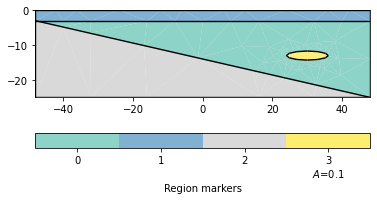

In [3]:
world = mt.createWorld(start=[left, 0], 
                    end=[right, -depth], 
                    layers=[-3])

line = mt.createLine(start=[left, -3], end=[right, -25])

block = mt.createCircle(pos=[30, -13.], radius=[6, 1.3], marker=3,
                        boundaryMarker=10, area=0.1, interpolate="spline")

geometry = world + line + block
pg.show(geometry);


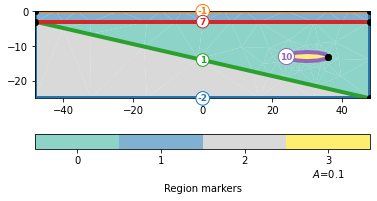

In [4]:
pg.show(geometry, boundaryMarkers=True);

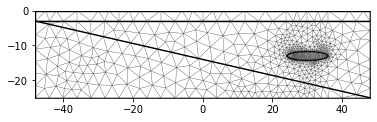

In [5]:
mesh = mt.createMesh(geometry, quality = 33.5, area= 10, smooth=True)
pg.show(mesh);

In [6]:
scheme = pb.createData(elecs=pg.utils.grange(start=-48, end=48, n=48),
                       schemeName='slm')


In [7]:
for pos in scheme.sensorPositions():
    geometry.createNode(pos)
    geometry.createNode(pos + pg.RVector3(0, -0.1))

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x22f6ac447f0>)

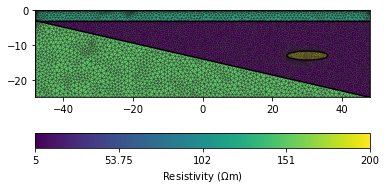

In [8]:
for p in scheme.sensors():
    geometry.createNode(p)
    geometry.createNode(p - [0, 0.1])

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh = mt.createMesh(geometry, quality=34, area= 1, smooth=True)

# Create a map to set resistivity values in the appropriate regions
# [[regionNumber, resistivity], [regionNumber, resistivity], [...]
rhomap = [[0, 5.],
          [1, 125.],
          [2, 150.],
          [3, 200.]]

# Take a look at the mesh and the resistivity distribution
pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000112959468122 : 0.010177159673841241
Simulated rhoa 529 [114.86419311232832,...,19.891784588369283] 114.86419311232832
Filtered rhoa 529 [114.86419311232832,...,19.891784588369283] 114.86419311232832


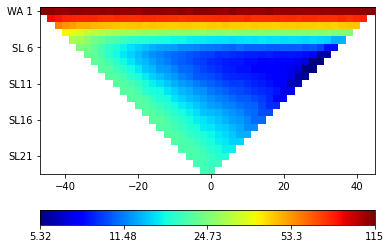

In [16]:
ert = pb.ERTManager()

# Perform the modeling with the mesh and the measuring scheme itself
# and return a data container with apparent resistivity values,
# geometric factors and estimated data errors specified by the noise setting.
# The noise is also added to the data.
data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1,
                    noiseAbs=1e-6)

# Optional: you can filter all values and tokens in the data container.
print('Simulated rhoa', data('rhoa'), max(data('rhoa')))

# Its possible that there are some negative data values due to noise and
# huge geometric factors. So we need to remove them
data.markInvalid(data('rhoa') < 0)
print('Filtered rhoa', data('rhoa'), max(data('rhoa')))
data.removeInvalid()

# Optional: save the data for further use
data.save('simple.dat')

# Optional: take a look at the data
pb.show(data)
plt.savefig("BERTDATAslmlandslide.jpg",dpi=1200, bbox_inches="tight") 

16/12/22 - 09:44:40 - pyGIMLi - INFO - Found 2 regions.
16/12/22 - 09:44:40 - pyGIMLi - INFO - Region with smallest marker (1) set to background
16/12/22 - 09:44:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/12/22 - 09:44:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/12/22 - 09:44:40 - pyGIMLi - INFO - Use median(data values)=17.25498407889498
16/12/22 - 09:44:40 - pyGIMLi - INFO - Created startmodel from forward operator: 3972 [17.25498407889498,...,17.25498407889498]
16/12/22 - 09:44:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022F69A8B2C0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022F6ACEC090>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022F69A8B360>
min/max (data): 5.27/114
min/max (error): 1%/1.02%
min/max (start model): 17.25/17.25
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 279.67 (dPhi = 87.01%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 32.6 (dPhi = 87.37%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 16.25 (dPhi = 46.63%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 8.37 (dPhi = 42.22%) lam: 5.0
-------------------------------------------------------

(<AxesSubplot:xlabel='x (m)', ylabel='z (m)'>,
 <matplotlib.colorbar.Colorbar at 0x22f6ac52190>)

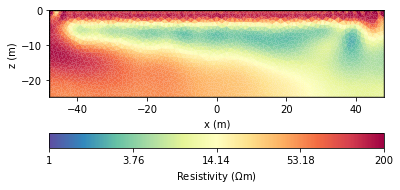

In [10]:
import matplotlib.pyplot as plt
import numpy as np
model = ert.invert(data,lam=5, paraMaxCellSize=1,
paraBoundary=0, paraDepth=25, verbose=True)
ert.showResult(cMin=1, cMax=200, xlabel="x (m)", ylabel="z (m)")


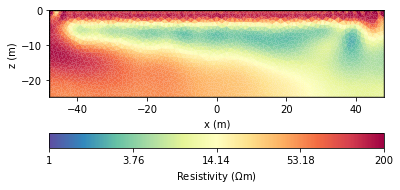

In [11]:
ert.showResult(cMin=1, cMax=200, xlabel="x (m)", ylabel="z (m)")
plt.savefig("BERTslmlandslide.jpg",dpi=1200, bbox_inches="tight") 

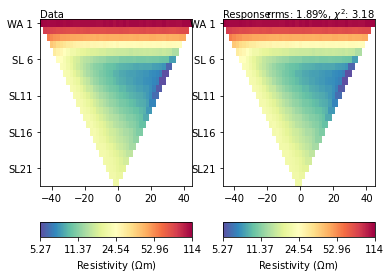

In [15]:
ert.showFit()
plt.savefig("BERTFIRslmlandslide.jpg",dpi=1200, bbox_inches="tight") 